## 1. Introduction
This project consists three data including one csv file, one tsv data on image information and one txt file extracted with Twitter API Tweepy. All three data may need cleaning before analysis. 

In [3436]:
import pandas as pd
import json
from timeit import default_timer as timer
import numpy as np
import seaborn as sb

## 2. Import Data and Data Structure

In [3437]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3438]:
import requests
import os
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3439]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3440]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [3441]:
os.listdir(folder_name)

['image-predictions.tsv']

In [3442]:
df_2 = pd.read_csv('image-predictions.tsv', sep = '\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3443]:
tweet_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet_list.append(json.loads(line))
print(tweet_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [3444]:
df_3 = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count'])

In [3445]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

df_1 is a dataframe consists of 2355 entries and 11 columns

In [3446]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


df_2 is a dataframe consists of 2075 entries and 12 columns

In [3447]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


df_2 is a dataframe consists of 2353 entries and 3 columns

## 3. Assessing Data
Dirty Data: Data that has issues with data content including missing data, invalid data, inaccurate date or inconsistent data

Messy Data: Data that has issues with its structure (columns, rows or table)

### 3.1 Visual Assessment

In [3448]:
df_1.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3449]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Julio. He was one of the original Ring...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669970042...,10,10,Julio,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
634,793614319594401792,NaN,NaN,2016-11-02 00:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When she says you're a good boy...,7.916723e+17,4.196984e+09,2016-10-27 16:06:04 +0000,https://twitter.com/dog_rates/status/791672322...,13,10,None,None,None,None,None
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rory. He's got an inter...,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
1604,685906723014619143,NaN,NaN,2016-01-09 19:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olive. He's stuck in a sleeve. 9/10 da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685906723...,9,10,Olive,None,None,None,None
2142,669972011175813120,NaN,NaN,2015-11-26 20:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see really big dog cuddling smaller do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669972011...,10,10,None,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,None,None,None,None
28,886680336477933568,NaN,NaN,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,None,None,None
476,816014286006976512,NaN,NaN,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None


In [3450]:
df_2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [3451]:
df_3.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


#### 3.1.1 Issues detected by Visual Assessment
1. Many NaN values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
2. Dogs' name called None.
3. The name for dogs mixed with lowercase and uppercase. 
4. The three tables share one same column 'tweet_id', so they can be merged into one table.
5. There four columns are about the dog types, which can be merged into one column.
6. In df_3, id should be changed into tweet_id

### 3.2 Programming Assessment

In [3452]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3453]:
df_1.duplicated().sum()

0

In [3454]:
df_1['tweet_id'].value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [3455]:
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [3456]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [3457]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [3458]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [3459]:
df_1.iloc[342]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                      832087547559997440.0
in_reply_to_user_id                                                  30582082.0
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

In [3460]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [3461]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### 3.2.1 Programming Assessment
1. Many NaN values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Some values missing in expanded_urls.
2. Datatype :  in df_1, df_2 and df_3 tweet_id should be string
               timestamp, retweeted_status_timestamp should be datetime,
               in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id be string
               numerator should be float according to the value in the dataframe.
3. Some dogs called a.
4. Decimal values, zeros and very large values found in rating_numerator.
5. Zero found in rating_denominator.



## 3.3 Data Issue Summary

#### Quality Issues:
1. Many NaN values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Some values missing in expanded_urls. Dogs' name called None.
2. The name for dogs mixed with lowercase and uppercase. 
3. Datatype :  in df_1, df_2 column tweet_id and id in df_3 should be string
               timestamp, retweeted_status_timestamp should be datetime,
               in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id be string
               numerator should be float according to the value in the dataframe.
5. The column expanded_urls was confusing information and not useful for analysis, and it could be dropped.
5. Decimal values, zeros and very large values found in rating_numerator, 
6. Zero found in rating_denominator while a denominator should never be zero. 
7. Some values of rating_numerator and rating_denominator were not extracted correctly from the text: eg. row with index 340. 
8. In row with index 342, there was a value show rating score with 11/15/15, which was difficult for interpretation.
9. In df_3, column names id should be changed into tweet_id before analysis.
#### Tidiness Issues:
1. The three tables share one same column 'tweet_id', so they can be merged into one table because they are part of same observational unit.
2. There four columns are about the dog types, which can be merged into one colum because they represent a same variable, and each variable forms a column.

## 4. Data Cleaning 

In [3462]:
# Make copies of data
df_1_clean = df_1
df_2_clean = df_2
df_3_clean = df_3

## 4.1 Issue #1

In [3463]:
df_1_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3464]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 4.1.1 Define Issue #1
. Fix or drop columns with too many columns including 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'.

### 4.1.2 Clean Issue #1

In [3465]:
# drop columns that will not be analyzed
df_1_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace = True)

### 4.1.3 Test Cleaned Issue #1

In [3466]:
df_1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


## 4.2 Issue #2

In [3467]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### 4.2.1 Define Issue #2
.Drop Columns 'expanded_urls' contain information because they were not relevant with the further analysis.

### 4.2.2 Clean Issue #2

In [3468]:
df_1_clean.drop(columns = ['expanded_urls'])

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


### 4.2.3 Test Cleaned Issue #2

In [3469]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


## 4.3 Issue #3

### 4.3.1 Define Issue #3
. In df_3 column name 'id' should be changed into 'tweet_id'
. Convert data Datatype :  
    .convert tweet_id in df_1, df_2 and df_3 to string,
    .convert timestamp, retweeted_status_timestamp to datetime,
    .convert in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to string,
    .convert numerator to float according to the value in the dataframe.

### 4.3.2 Clean Issue #3

In [3470]:
df_3_clean = df_3_clean.rename(columns = {'id': 'tweet_id'})

In [3471]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [3472]:
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)
df_1_clean['rating_numerator'] = df_1_clean['rating_numerator'].astype(float) 
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

In [3473]:
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

In [3474]:
df_3_clean['tweet_id'] = df_3_clean['tweet_id'].astype(str)

### 4.3.3 Test Cleaned Issue #3

In [3475]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [3476]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [3477]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## 4.4 Issue #4

### 4.4.1 Define Issue #4
. Replace the dogs' name None with NaN so that these values will not be calculated

### 4.4.2 Clean Issue #4

In [3478]:
df_1_clean['name'].replace('None', np.nan, inplace = True)

### 4.4.3 Test Issue #4

In [3479]:
df_1_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1497,692423280028966913,2016-01-27 19:05:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: just noticed this dog has some extra ...,NaN,9.0,10,NaN,None,None,None,None
373,828376505180889089,2017-02-05 22:55:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",https://twitter.com/dog_rates/status/828376505...,13.0,10,Beebop,None,None,None,None
1608,685641971164143616,2016-01-09 01:59:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,https://twitter.com/dog_rates/status/685641971...,7.0,10,Otis,None,None,pupper,None
1294,707995814724026368,2016-03-10 18:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,https://twitter.com/dog_rates/status/707995814...,12.0,10,Farfle,None,None,None,None
1981,672970152493887488,2015-12-05 02:46:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,https://twitter.com/dog_rates/status/672970152...,7.0,10,Chet,None,None,pupper,None


## 4.5 Issue #5

### 4.5.1 Test Issue #5
. Convert all the dog names into uppercases.

### 4.5.2 Clean Issue #5

In [3480]:
df_1_clean['name'] = df_1_clean['name'].str.upper()

### 4.5.3 Test Issue #5

In [3481]:
df_1_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
442,819588359383371776,2017-01-12 16:54:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,https://twitter.com/dog_rates/status/819588359...,13.0,10,JAZZY,None,None,None,None
1338,705066031337840642,2016-03-02 16:23:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He's a Chilean Sohcahtoa. Loves...,https://twitter.com/dog_rates/status/705066031...,12.0,10,REESE,None,None,None,None
672,789903600034189313,2016-10-22 18:57:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,https://vine.co/v/5wPT1aBxPQZ,13.0,10,RALPHY,None,None,pupper,None


## 4.6 Issue #6 
.Unusual numerator and denominator values

In [3482]:
df_1_clean.iloc[340].text

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [3483]:
df_1_clean.rating_numerator.value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
2.0         9
1.0         9
75.0        2
15.0        2
420.0       2
0.0         2
80.0        1
144.0       1
17.0        1
26.0        1
20.0        1
121.0       1
143.0       1
44.0        1
60.0        1
45.0        1
50.0        1
99.0        1
204.0       1
1776.0      1
165.0       1
666.0       1
27.0        1
182.0       1
24.0        1
960.0       1
84.0        1
88.0        1
Name: rating_numerator, dtype: int64

In [3484]:
numerator_full = df_1_clean.rating_numerator.value_counts().index
numerator = numerator_full[14:]
numerator

Float64Index([  75.0,   15.0,  420.0,    0.0,   80.0,  144.0,   17.0,   26.0,
                20.0,  121.0,  143.0,   44.0,   60.0,   45.0,   50.0,   99.0,
               204.0, 1776.0,  165.0,  666.0,   27.0,  182.0,   24.0,  960.0,
                84.0,   88.0],
             dtype='float64')

In [3485]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 75.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75.0,10,LOGAN,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,LOGAN,None,None,None,None


### 4.6.1.1 Define Issue #6.1
.Extract rating_numerator from text to fix row with index 340 and 695 in rating_numerator column

### 4.6.1.2 Clean Issue #6.1

In [3486]:
df_1_clean.loc[340, 'rating_numerator'] = 97.5
df_1_clean.loc[695, 'rating_numerator'] = 97.5

### 4.6.1.3 Test Issue #6.1

In [3487]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 97.5]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,97.5,10,LOGAN,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,97.5,10,LOGAN,None,None,None,None


### 4.6.2.1 Define Issue #6.2
.Extract rating_numerator from text to fix row with index 55 in rating_numerator column

In [3488]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 17.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,10,NaN,None,None,None,None


### 4.6.2.2 Clean Issue #6.2

In [3489]:
df_1_clean.loc[55, 'rating_numerator'] = 13

### 4.6.2.3 Test Issue #6.2

In [3490]:
df_1_clean.iloc[55]

tweet_id                                             881633300179243008
timestamp                                     2017-07-02 21:58:53+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  @roushfenway These are good dogs but 17/10 is ...
expanded_urls                                                       NaN
rating_numerator                                                   13.0
rating_denominator                                                   10
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 55, dtype: object

### 4.6.3.1 Define Issue #6.3
.Extract rating_numerator and denominator from text to fix row with index 1712 in rating_numerator column

In [3491]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 26]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,NaN,None,None,None,None


### 4.6.3.2 Clean Issue #6.3

In [3492]:
df_1_clean.loc[1712, 'rating_numerator'] = 11.26
df_1_clean.loc[1712, 'rating_denominator'] = 10

### 4.6.3.3 Test Issue #6.3

In [3493]:
df_1_clean.iloc[1712]

tweet_id                                             680494726643068929
timestamp                                     2015-12-25 21:06:00+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  Here we have uncovered an entire battalion of ...
expanded_urls         https://twitter.com/dog_rates/status/680494726...
rating_numerator                                                  11.26
rating_denominator                                                   10
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1712, dtype: object

### 4.6.4.1 Define Issue #6.4
.Extract rating_numerator and denominator from text to fix row with index 1202 in rating_numerator column

In [3494]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 50]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50,BLUEBERT,None,None,None,None


### 4.6.4.2 Clean Issue #6.4

In [3495]:
df_1_clean.loc[1202, 'rating_numerator'] = 11
df_1_clean.loc[1202, 'rating_denominator'] = 10

### 4.6.4.3 Test Issue #6.4

In [3496]:
df_1_clean.iloc[1202]

tweet_id                                             716439118184652801
timestamp                                     2016-04-03 01:36:11+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Bluebert. He just saw that both #Final...
expanded_urls         https://twitter.com/dog_rates/status/716439118...
rating_numerator                                                   11.0
rating_denominator                                                   10
name                                                           BLUEBERT
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1202, dtype: object

### 4.6.5.1 Define Issue #6.5
.Extract rating_numerator and denominator from text to fix row with index 763 in rating_numerator column

In [3497]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 27]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,SOPHIE,None,None,pupper,None


### 4.6.5.2 Clean Issue #6.5

In [3498]:
df_1_clean.loc[763, 'rating_numerator'] = 11.27

### 4.6.5.3 Test Issue #6.5

In [3499]:
df_1_clean.iloc[763]

tweet_id                                             778027034220126208
timestamp                                     2016-09-20 00:24:34+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Sophie. She's a Jubilant Bush Pupper. ...
expanded_urls         https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                  11.27
rating_denominator                                                   10
name                                                             SOPHIE
doggo                                                              None
floofer                                                            None
pupper                                                           pupper
puppo                                                              None
Name: 763, dtype: object

### 4.6.6.1 Define Issue #6.6
.Extract rating_numerator and denominator from text to fix row with index 313 in rating_numerator column

In [3500]:
df_1_clean.loc[df_1_clean['rating_numerator'] == 960]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0,NaN,None,None,None,None


### 4.6.6.2 Clean Issue #6.6

In [3501]:
df_1_clean.loc[313, 'rating_numerator'] = 13

### 4.6.6.3 Test Issue #6.6

In [3502]:
df_1_clean.iloc[313]

tweet_id                                             835246439529840640
timestamp                                     2017-02-24 21:54:03+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  @jonnysun @Lin_Manuel ok jomny I know you're e...
expanded_urls                                                       NaN
rating_numerator                                                   13.0
rating_denominator                                                    0
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 313, dtype: object

## 4.7 Issue #7

In [3503]:
df_1_clean['score'] = df_1_clean['rating_numerator'] / df_1_clean['rating_denominator']
df_1_clean['score'] 

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: score, Length: 2356, dtype: float64

In [3504]:
df_1_clean['score'].value_counts()

1.200000      562
1.100000      470
1.000000      462
1.300000      352
0.900000      157
0.800000      102
1.400000       54
0.700000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
0.818182        2
0.000000        2
9.750000        2
1.500000        2
42.000000       2
0.636364        1
1.250000        1
177.600000      1
0.733333        1
1.127000        1
3.428571        1
inf             1
18.200000       1
66.600000       1
1.126000        1
Name: score, dtype: int64

In [3505]:
df_1_clean.loc[df_1_clean['score'] >= 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
188,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420.0,10,NaN,None,None,None,None,42.000000
189,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666.0,10,NaN,None,None,None,None,66.600000
290,838150277551247360,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,182.0,10,NaN,None,None,None,None,18.200000
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13.0,0,NaN,None,None,None,None,inf
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,97.5,10,LOGAN,None,None,None,None,9.750000
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,SAM,None,None,None,None,3.428571
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,97.5,10,LOGAN,None,None,None,None,9.750000
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,ATTICUS,None,None,None,None,177.600000
2074,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,None,None,None,None,42.000000


### 4.7.1 Define Issue #7
.Fix rating_denominator by extracting number from text in column 'score' caused by the denominator value 0.

### 4.7.2 Clean Issue #7

In [3506]:
df_1_clean.loc[313, 'rating_denominator'] = 10

### 4.7.3 Test Issue #7

In [3507]:
df_1_clean.rating_denominator.value_counts()

10     2335
11        3
50        2
20        2
80        2
120       1
16        1
110       1
130       1
40        1
90        1
15        1
170       1
150       1
7         1
70        1
2         1
Name: rating_denominator, dtype: int64

## 4.8 Issue #8

### 4.8.1 Define Issue #8
.Fix rating_nominator by extracting numbers from text because of uncorrectly extraction.

In [3508]:
df_1_clean.loc[df_1_clean['rating_denominator'] == 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20,NaN,None,None,None,None,0.2
1598,686035780142297088,2016-01-10 04:04:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,4.0,20,NaN,None,None,None,None,0.2


In [3509]:
df_1_clean.iloc[1598].text

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

### 4.8.2 Clean Issue #8

In [3510]:
df_1_clean.loc[1165, 'rating_numerator'] = 13
df_1_clean.loc[1165, 'rating_denominator'] = 10
# more than one dog

### 4.8.3 Test Issue #8

In [3511]:
df_1_clean.loc[1165]

tweet_id                                             722974582966214656
timestamp                                     2016-04-21 02:25:47+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  Happy 4/20 from the squad! 13/10 for all https...
expanded_urls         https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                   13.0
rating_denominator                                                   10
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
score                                                               0.2
Name: 1165, dtype: object

## 4.9 Issue #9

### 4.9.1 Define Issue #9
.Drop row with index 342 because the rating in text cannot be interpreted

In [3512]:
df_1_clean.loc[df_1_clean['rating_denominator'] == 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
342,832088576586297345,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11.0,15,NaN,None,None,None,None,0.733333


### 4.9.2 Clean Issue #9

In [3513]:
# difficult to understand the score, could be dropped
df_1_clean.drop(index = 342, inplace = True)

### 4.9.3 Test Issue #9

In [3514]:
df_1_clean.loc[df_1_clean['tweet_id'] == '832088576586297345']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score


## 4.10 Issue #10

In [3515]:
df_1_clean.loc[df_1_clean['rating_denominator'] == 2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,AN,None,None,None,None,0.5


### 4.10.1 Define Issue #10
. Fix both rating_numerator and rating_denominator in row with index 2335

### 4.10.1 Clean Issue #10

In [3516]:
df_1_clean.loc[2335, 'rating_numerator'] = 9
df_1_clean.loc[2335, 'rating_denominator'] = 10

### 4.10.1 Test Issue #10

In [3517]:
df_1_clean.loc[df_1_clean['tweet_id'] == '666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,AN,None,None,None,None,0.5


## 4.11 Issue #11

In [3518]:
df_1_clean[df_1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/var/folders/zt/nxcj7z6x6qgdyb_2097xzz_c0000gn/T/ipykernel_503/2877340874.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_1_clean[df_1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5.00,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",97.50,10
695,"This is Logan, the Chow who lived. He solemnly...",97.50,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1689,I've been told there's a slight possibility he...,5.00,10
1712,Here we have uncovered an entire battalion of ...,11.26,10


### 4.11.1 Define Issue #11
.Fix rating_numerator in row with index 45 and 1689

### 4.11.2 Clean Issue #11

In [3519]:
df_1_clean.loc[45, 'rating_numerator'] = 13.5
df_1_clean.loc[1689, 'rating_denominator'] = 9.5

### 4.11.3 Test Issue #11

In [3520]:
df_1_clean.iloc[45]

tweet_id                                             883482846933004288
timestamp                                     2017-07-08 00:28:19+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                 10.0
name                                                              BELLA
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
score                                                               0.5
Name: 45, dtype: object

In [3521]:
df_1_clean.iloc[1689]

tweet_id                                             681339448655802368
timestamp                                     2015-12-28 05:02:37+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Asher. He's not wearing a seatbelt or ...
expanded_urls         https://twitter.com/dog_rates/status/681339448...
rating_numerator                                                    9.0
rating_denominator                                                 10.0
name                                                              ASHER
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
score                                                               0.9
Name: 1690, dtype: object

In [3522]:
df_1_clean[df_1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

/var/folders/zt/nxcj7z6x6qgdyb_2097xzz_c0000gn/T/ipykernel_503/2877340874.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_1_clean[df_1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",97.50,10.0
695,"This is Logan, the Chow who lived. He solemnly...",97.50,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0
1689,I've been told there's a slight possibility he...,5.00,9.5
1712,Here we have uncovered an entire battalion of ...,11.26,10.0


## 4.12 Issue #12

In [3523]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### 4.12 Define Issue #12
.Drop the tweet entries with tweet_id 832088576586297345 in df_3_clean since this tweet_id was dropped fron df_1_clean.

In [3524]:
df_3_clean.loc[df_3_clean['tweet_id'] == '832088576586297345']

,tweet_id,retweet_count,favorite_count
341,832088576586297345,3,72


### 4.12 Clean Issue #12

In [3525]:
df_3_clean.drop(index = 341, inplace = True)

### 4.12 Test Issue #12

In [3526]:
df_3_clean.loc[df_3_clean['tweet_id'] == '832088576586297345']

,tweet_id,retweet_count,favorite_count


In [3527]:
df_3_clean.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 4.13 Issue #13

### 4.13.1 Define Issue #13
. Combine all three data tables into one table

### 4.13.2 Clean Issue #13

In [3528]:
df_merge = df_1_clean.join(df_3_clean.set_index('tweet_id'), on = 'tweet_id')

In [3529]:
df_merge.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,PHINEAS,None,None,None,None,1.3,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,TILLY,None,None,None,None,1.3,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,ARCHIE,None,None,None,None,1.2,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,DARLA,None,None,None,None,1.3,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,FRANKLIN,None,None,None,None,1.2,9774.0,41048.0


In [3530]:
df_2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3531]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [3532]:
df_merge_final = df_merge.join(df_2_clean.set_index('tweet_id'), on = 'tweet_id')

### 4.13.3 Test Issue #13

In [3533]:
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2355 non-null   object             
 1   timestamp           2355 non-null   datetime64[ns, UTC]
 2   source              2355 non-null   object             
 3   text                2355 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2355 non-null   float64            
 6   rating_denominator  2355 non-null   float64            
 7   name                1611 non-null   object             
 8   doggo               2355 non-null   object             
 9   floofer             2355 non-null   object             
 10  pupper              2355 non-null   object             
 11  puppo               2355 non-null   object             
 12  score               2355 non-null 

In [3534]:
df_merge_final.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,PHINEAS,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,TILLY,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,ARCHIE,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


## 4.14 Issue #14

In [3535]:
print(df_merge_final.doggo.value_counts())
print(df_merge_final.floofer.value_counts())
print(df_merge_final.pupper.value_counts())
print(df_merge_final.puppo.value_counts())

None     2258
doggo      97
Name: doggo, dtype: int64
None       2345
floofer      10
Name: floofer, dtype: int64
None      2098
pupper     257
Name: pupper, dtype: int64
None     2325
puppo      30
Name: puppo, dtype: int64


### 4.14.1 Define Issue #14
. Merge columns 'doggo', 'floofer', 'pupper' and 'puppo' into one column named 'dog_types'

### 4.14.2 Clean Issue #14

In [3536]:
df_merge_final['dog_types'] = df_merge_final['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [3537]:
df_merge_final.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
2277,667437278097252352,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10.0,NaN,None,None,...,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,NaN
602,798644042770751489,2016-11-15 21:49:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Paull. He just stubbed ...,https://twitter.com/dog_rates/status/670444955...,10.0,10.0,PAULL,None,None,...,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True,NaN
2174,669216679721873412,2015-11-24 18:11:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,https://twitter.com/dog_rates/status/669216679...,8.0,10.0,CLARQ,None,None,...,golden_retriever,0.992758,True,Irish_setter,0.003379,True,Saluki,0.001230,True,NaN
165,860177593139703809,2017-05-04 17:01:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10.0,10.0,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,835536468978302976,2017-02-25 17:06:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Lola. Her hobbies include ...,https://www.gofundme.com/lolas-life-saving-sur...,12.0,10.0,LOLA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3538]:
df_merge_final.dog_types.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_types, dtype: int64

In [3539]:
df_merge_final = df_merge_final.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

### 4.14.3 Test Issue #14

In [3540]:
df_merge_final.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,score,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
2197,668826086256599040,2015-11-23 16:18:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,https://twitter.com/dog_rates/status/668826086...,10.0,10.0,BANDITT,1.0,150.0,...,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True,NaN
1783,677673981332312066,2015-12-18 02:17:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,https://twitter.com/dog_rates/status/677673981...,9.0,10.0,NaN,0.9,1677.0,...,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True,NaN
306,836001077879255040,2017-02-26 23:52:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,13.0,10.0,NaN,1.3,4935.0,...,Samoyed,0.963558,True,white_wolf,0.019848,False,malamute,0.005904,True,NaN
1081,738885046782832640,2016-06-04 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's a Nova Scotian Towel Pou...,https://twitter.com/dog_rates/status/738885046...,11.0,10.0,CHARLES,1.1,1283.0,...,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True,NaN
1562,688211956440801280,2016-01-16 04:11:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derby. He's a superstar. 13/10 (vid by...,https://twitter.com/dog_rates/status/688211956...,13.0,10.0,DERBY,1.3,937.0,...,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False,NaN


In [3541]:
df_merge_final.loc[df_merge_final['dog_types'] == 'floofer']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,score,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
46,883360690899218434,2017-07-07 16:22:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,GRIZZWALD,1.3,3825.0,...,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True,floofer
582,800388270626521089,2016-11-20 17:20:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12.0,10.0,DOC,1.2,3265.0,...,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True,floofer
774,776218204058357768,2016-09-15 00:36:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13.0,10.0,NaN,1.3,18497.0,...,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True,floofer
1022,746542875601690625,2016-06-25 03:17:46+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,https://vine.co/v/5uZYwqmuDeT,11.0,10.0,NaN,1.1,2104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,floofer


In [3542]:
df_merge_final.describe()

,rating_numerator,rating_denominator,score,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2355.000000,2355.000000,2355.0,2353.000000,2353.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,12.724004,10.439703,inf,3166.141096,8084.372291,1.203855,0.594548,1.345886e-01,6.032417e-02
std,41.550838,6.688002,NaN,5285.491469,11816.128264,0.561875,0.271174,1.006657e-01,5.090593e-02
min,0.000000,7.000000,0.0,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1.0,626.000000,1415.000000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,11.000000,10.000000,1.1,1474.000000,3604.000000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,12.000000,10.000000,1.2,3652.000000,10132.000000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,1776.000000,170.000000,inf,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## 4.15 Issue #15

In [3543]:
df_merge_final.loc[df_merge_final['score'] >= 100]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,score,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13.0,10.0,NaN,inf,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,ATTICUS,177.6,2772.0,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN


## 4.15.1 Define Issue #15
. Drop row with index 313 because calculated score equals inf.

## 4.15.2 Clean Issue #15

In [3544]:
df_merge_final.drop(index = 313, inplace = True)

## 4.15.3 Test Issue #15

In [3545]:
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   source              2354 non-null   object             
 3   text                2354 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2354 non-null   float64            
 6   rating_denominator  2354 non-null   float64            
 7   name                1611 non-null   object             
 8   score               2354 non-null   float64            
 9   retweet_count       2352 non-null   float64            
 10  favorite_count      2352 non-null   float64            
 11  jpg_url             2075 non-null   object             
 12  img_num             2075 non-null 

## 5 Save Data

In [3546]:
df_merge_final.to_csv('twitter_archive_master.csv')

In [3547]:
df_merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2354 non-null   object             
 1   timestamp           2354 non-null   datetime64[ns, UTC]
 2   source              2354 non-null   object             
 3   text                2354 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2354 non-null   float64            
 6   rating_denominator  2354 non-null   float64            
 7   name                1611 non-null   object             
 8   score               2354 non-null   float64            
 9   retweet_count       2352 non-null   float64            
 10  favorite_count      2352 non-null   float64            
 11  jpg_url             2075 non-null   object             
 12  img_num             2075 non-null 

In [3548]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(3)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,score,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,PHINEAS,1.3,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,TILLY,1.3,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,ARCHIE,1.2,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN


In [3549]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [3550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2354 non-null   int64  
 1   timestamp           2354 non-null   object 
 2   source              2354 non-null   object 
 3   text                2354 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2354 non-null   float64
 6   rating_denominator  2354 non-null   float64
 7   name                1611 non-null   object 
 8   score               2354 non-null   float64
 9   retweet_count       2352 non-null   float64
 10  favorite_count      2352 non-null   float64
 11  jpg_url             2075 non-null   object 
 12  img_num             2075 non-null   float64
 13  p1                  2075 non-null   object 
 14  p1_conf             2075 non-null   float64
 15  p1_dog              2075 non-null   object 
 16  p2    

In [3551]:
df.to_csv('twitter_archive_master.csv')

## 6 Data Analysis and Visualization

In [3552]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3553]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,score,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.354000e+03,2354.000000,2354.000000,2354.000000,2352.000000,2352.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.426944e+17,12.723887,10.439890,1.222729,3167.451956,8086.849065,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.854492e+16,41.559666,6.689417,4.087580,5286.232860,11818.030065,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783975e+17,10.000000,10.000000,1.000000,626.750000,1415.000000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.194596e+17,11.000000,10.000000,1.100000,1475.500000,3607.000000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.992387e+17,12.000000,10.000000,1.200000,3652.000000,10133.750000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1776.000000,170.000000,177.600000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


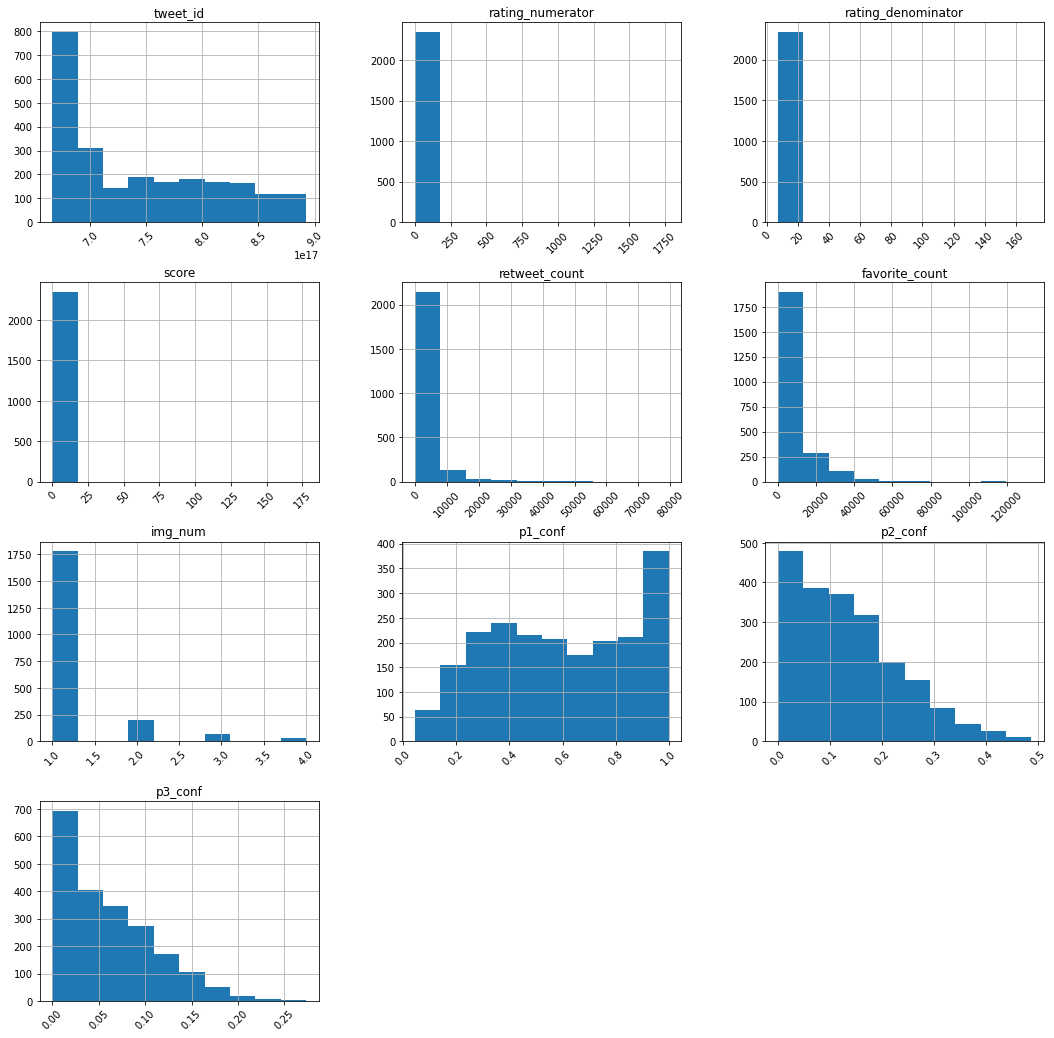

In [3554]:
df.hist(figsize = [18,18], xrot = 45);

In [3555]:
df.corr()

,tweet_id,rating_numerator,rating_denominator,score,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000000,0.042289,-0.027404,0.047847,0.391013,0.529345,0.206521,0.101821,0.002012,-0.043424
rating_numerator,0.042289,1.000000,0.180408,0.983155,0.006130,0.004756,-0.000298,-0.008975,-0.021098,-0.005539
rating_denominator,-0.027404,0.180408,1.000000,-0.001879,-0.021703,-0.022424,-0.003101,-0.000990,-0.039915,-0.005164
score,0.047847,0.983155,-0.001879,1.000000,0.010060,0.008611,0.000353,-0.008868,-0.013460,-0.004457
retweet_count,0.391013,0.006130,-0.021703,0.010060,1.000000,0.702796,0.105534,0.044739,-0.008619,-0.035511
favorite_count,0.529345,0.004756,-0.022424,0.008611,0.702796,1.000000,0.132241,0.076077,-0.022787,-0.053427
img_num,0.206521,-0.000298,-0.003101,0.000353,0.105534,0.132241,1.000000,0.203571,-0.159956,-0.139622
p1_conf,0.101821,-0.008975,-0.000990,-0.008868,0.044739,0.076077,0.203571,1.000000,-0.511298,-0.709449
p2_conf,0.002012,-0.021098,-0.039915,-0.013460,-0.008619,-0.022787,-0.159956,-0.511298,1.000000,0.479027
p3_conf,-0.043424,-0.005539,-0.005164,-0.004457,-0.035511,-0.053427,-0.139622,-0.709449,0.479027,1.000000


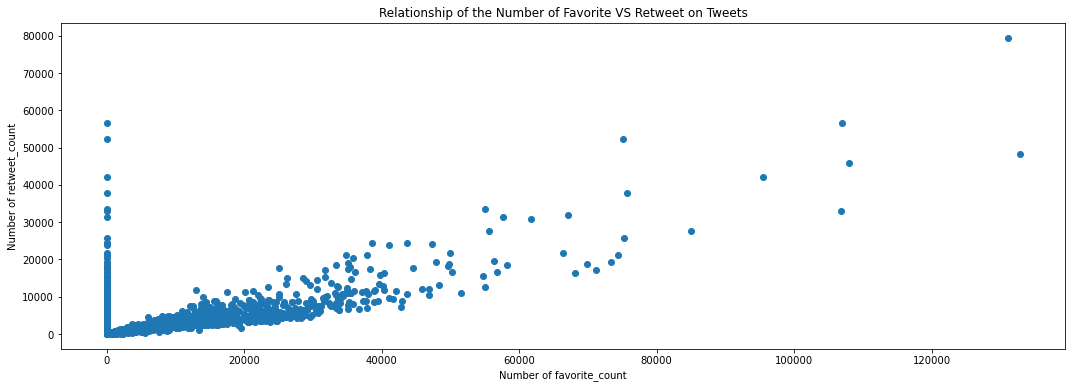

In [3556]:
# favourite_count correlated with retweet_count
plt.figure(figsize = [18,6])
plt.scatter(data = df, x = 'favorite_count', y = 'retweet_count');
plt.xlabel('Number of favorite_count')
plt.ylabel('Number of retweet_count')
plt.title('Relationship of the Number of Favorite VS Retweet on Tweets');

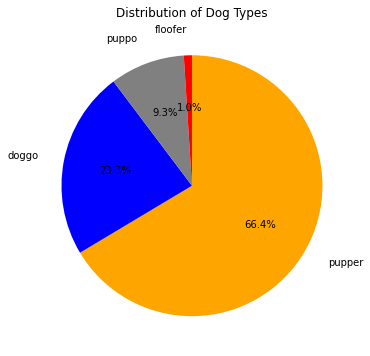

In [3557]:
plt.figure(figsize = [18,6])
sorted_counts = df['dog_types'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct = '%1.1f%%', labeldistance = 1.2, colors = ['orange', 'blue', 'grey','red'], startangle = 90, counterclock = False);
plt.title('Distribution of Dog Types');

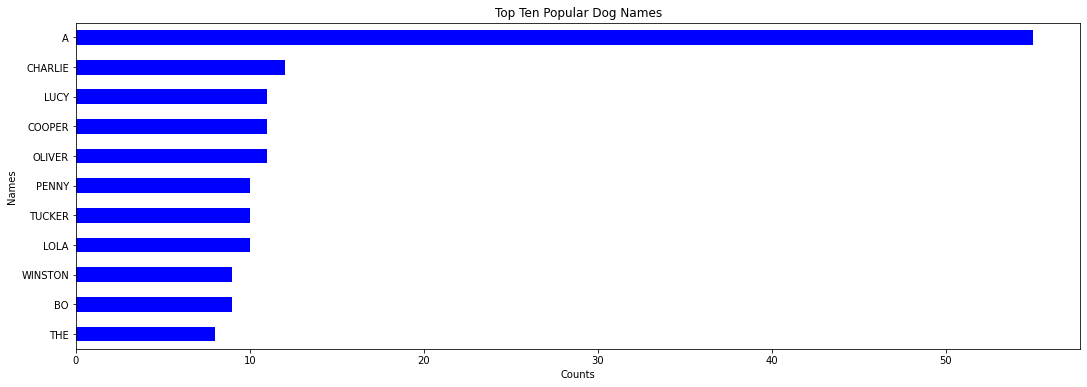

In [3558]:
plt.figure(figsize = [18,6])
name_counts = df.name.value_counts()[0:11].sort_values()
name_counts.plot(kind = 'barh', color = 'blue')
plt.xlabel('Counts')
plt.ylabel('Names')
plt.title('Top Ten Popular Dog Names');